In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error as MAE

from sklearn.metrics import mean_squared_error as MSE

from sklearn.metrics import r2_score

from sklearn.model_selection  import cross_val_score 

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [11]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
df.shape

(30, 17)

In [15]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [17]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

DATA VISUALIZATION

<AxesSubplot:>

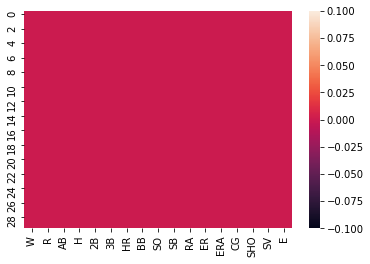

In [18]:
sns.heatmap(df.isnull())

<AxesSubplot:>

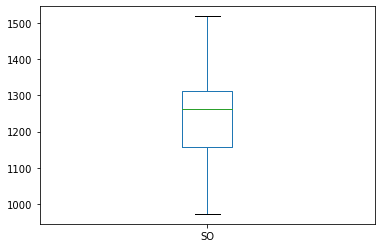

In [19]:
df['SO'].plot.box()

<AxesSubplot:>

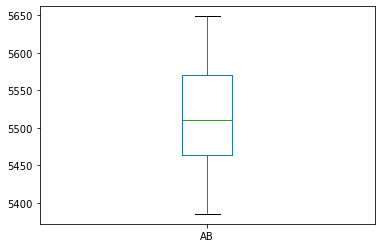

In [20]:
df['AB'].plot.box()

<AxesSubplot:>

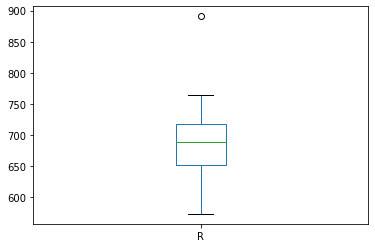

In [21]:
df['R'].plot.box()

<AxesSubplot:>

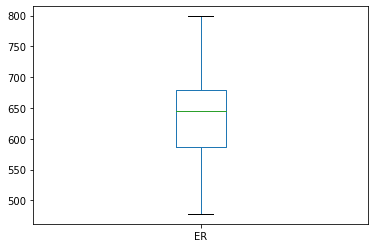

In [22]:
df['ER'].plot.box()

<AxesSubplot:>

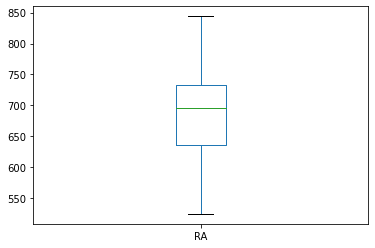

In [23]:
df['RA'].plot.box()

W         AxesSubplot(0.125,0.787927;0.168478x0.0920732)
R      AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
AB     AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
H      AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
2B        AxesSubplot(0.125,0.677439;0.168478x0.0920732)
3B     AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
HR     AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
BB     AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
SO        AxesSubplot(0.125,0.566951;0.168478x0.0920732)
SB     AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
RA     AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
ER     AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
ERA       AxesSubplot(0.125,0.456463;0.168478x0.0920732)
CG     AxesSubplot(0.327174,0.456463;0.168478x0.0920732)
SHO    AxesSubplot(0.529348,0.456463;0.168478x0.0920732)
SV     AxesSubplot(0.731522,0.456463;0.168478x0.0920732)
E         AxesSubplot(0.125,0.345976;0.168478x0.0920732)
dtype: object

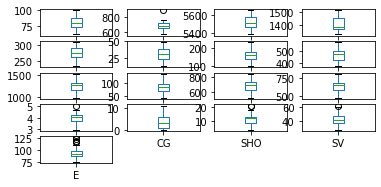

In [30]:
df.plot(kind='box',subplots=True,layout=(7,4))

CHECKING CORREALATION

In [31]:
dfcor=df.corr()

In [32]:
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

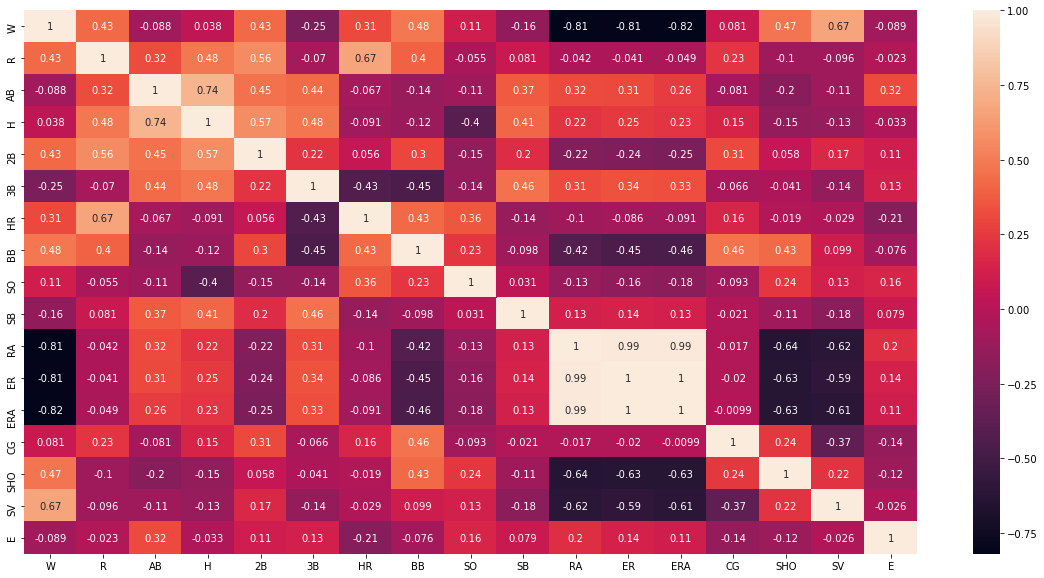

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='Frequency'>

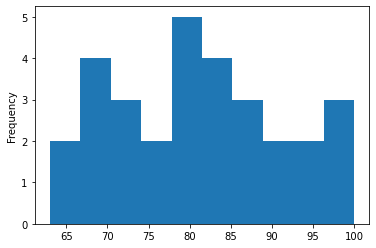

In [35]:
df['W'].plot.hist()

<AxesSubplot:xlabel='W', ylabel='Density'>

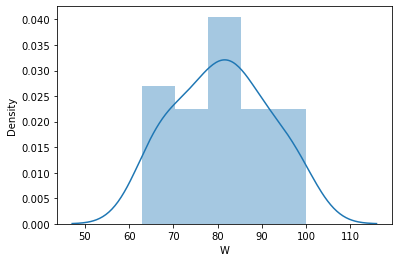

In [36]:
sns.distplot(df['W'])

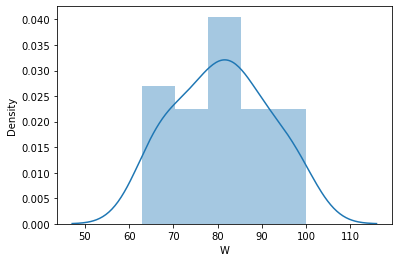

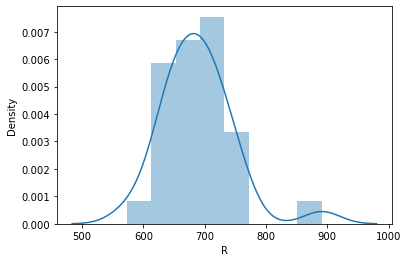

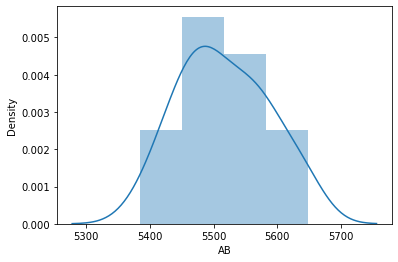

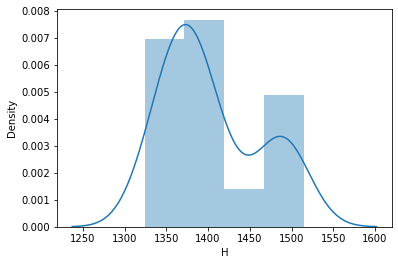

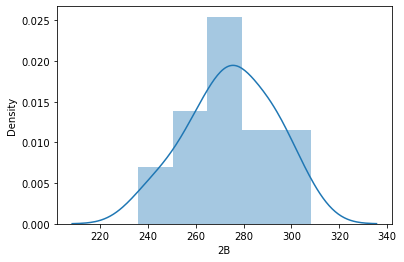

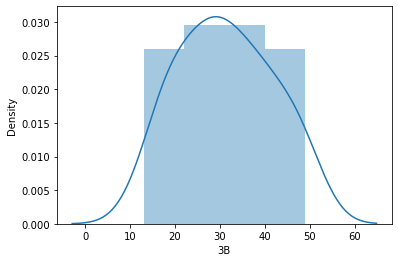

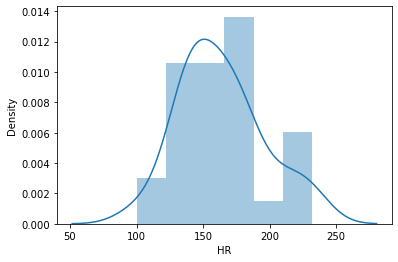

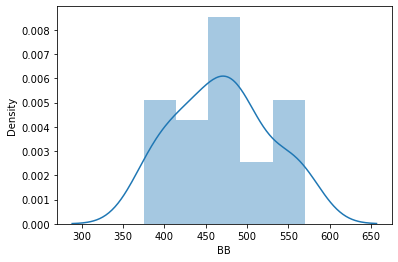

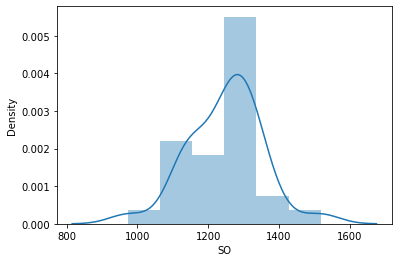

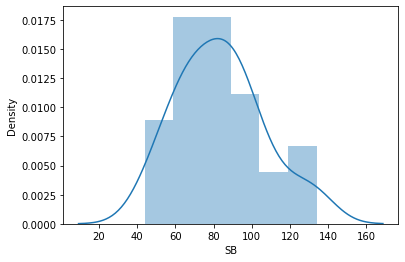

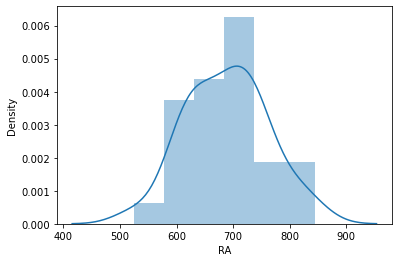

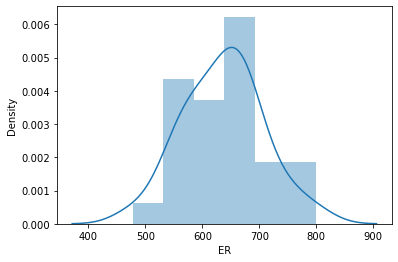

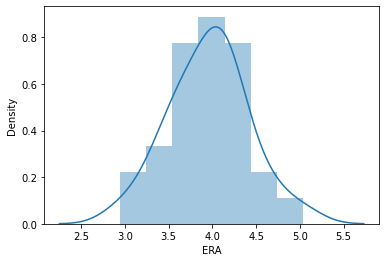

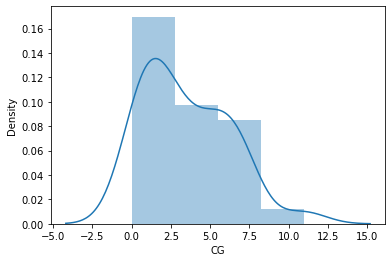

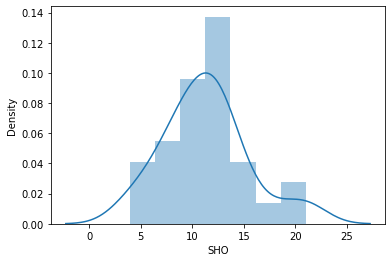

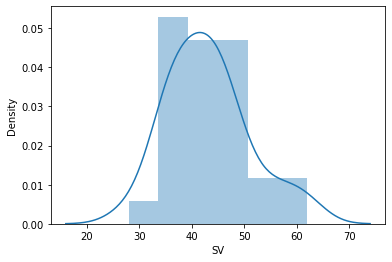

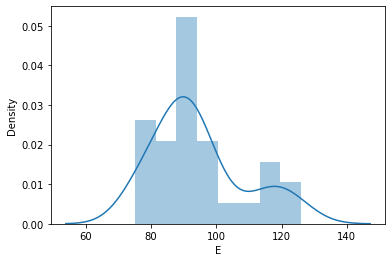

In [37]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

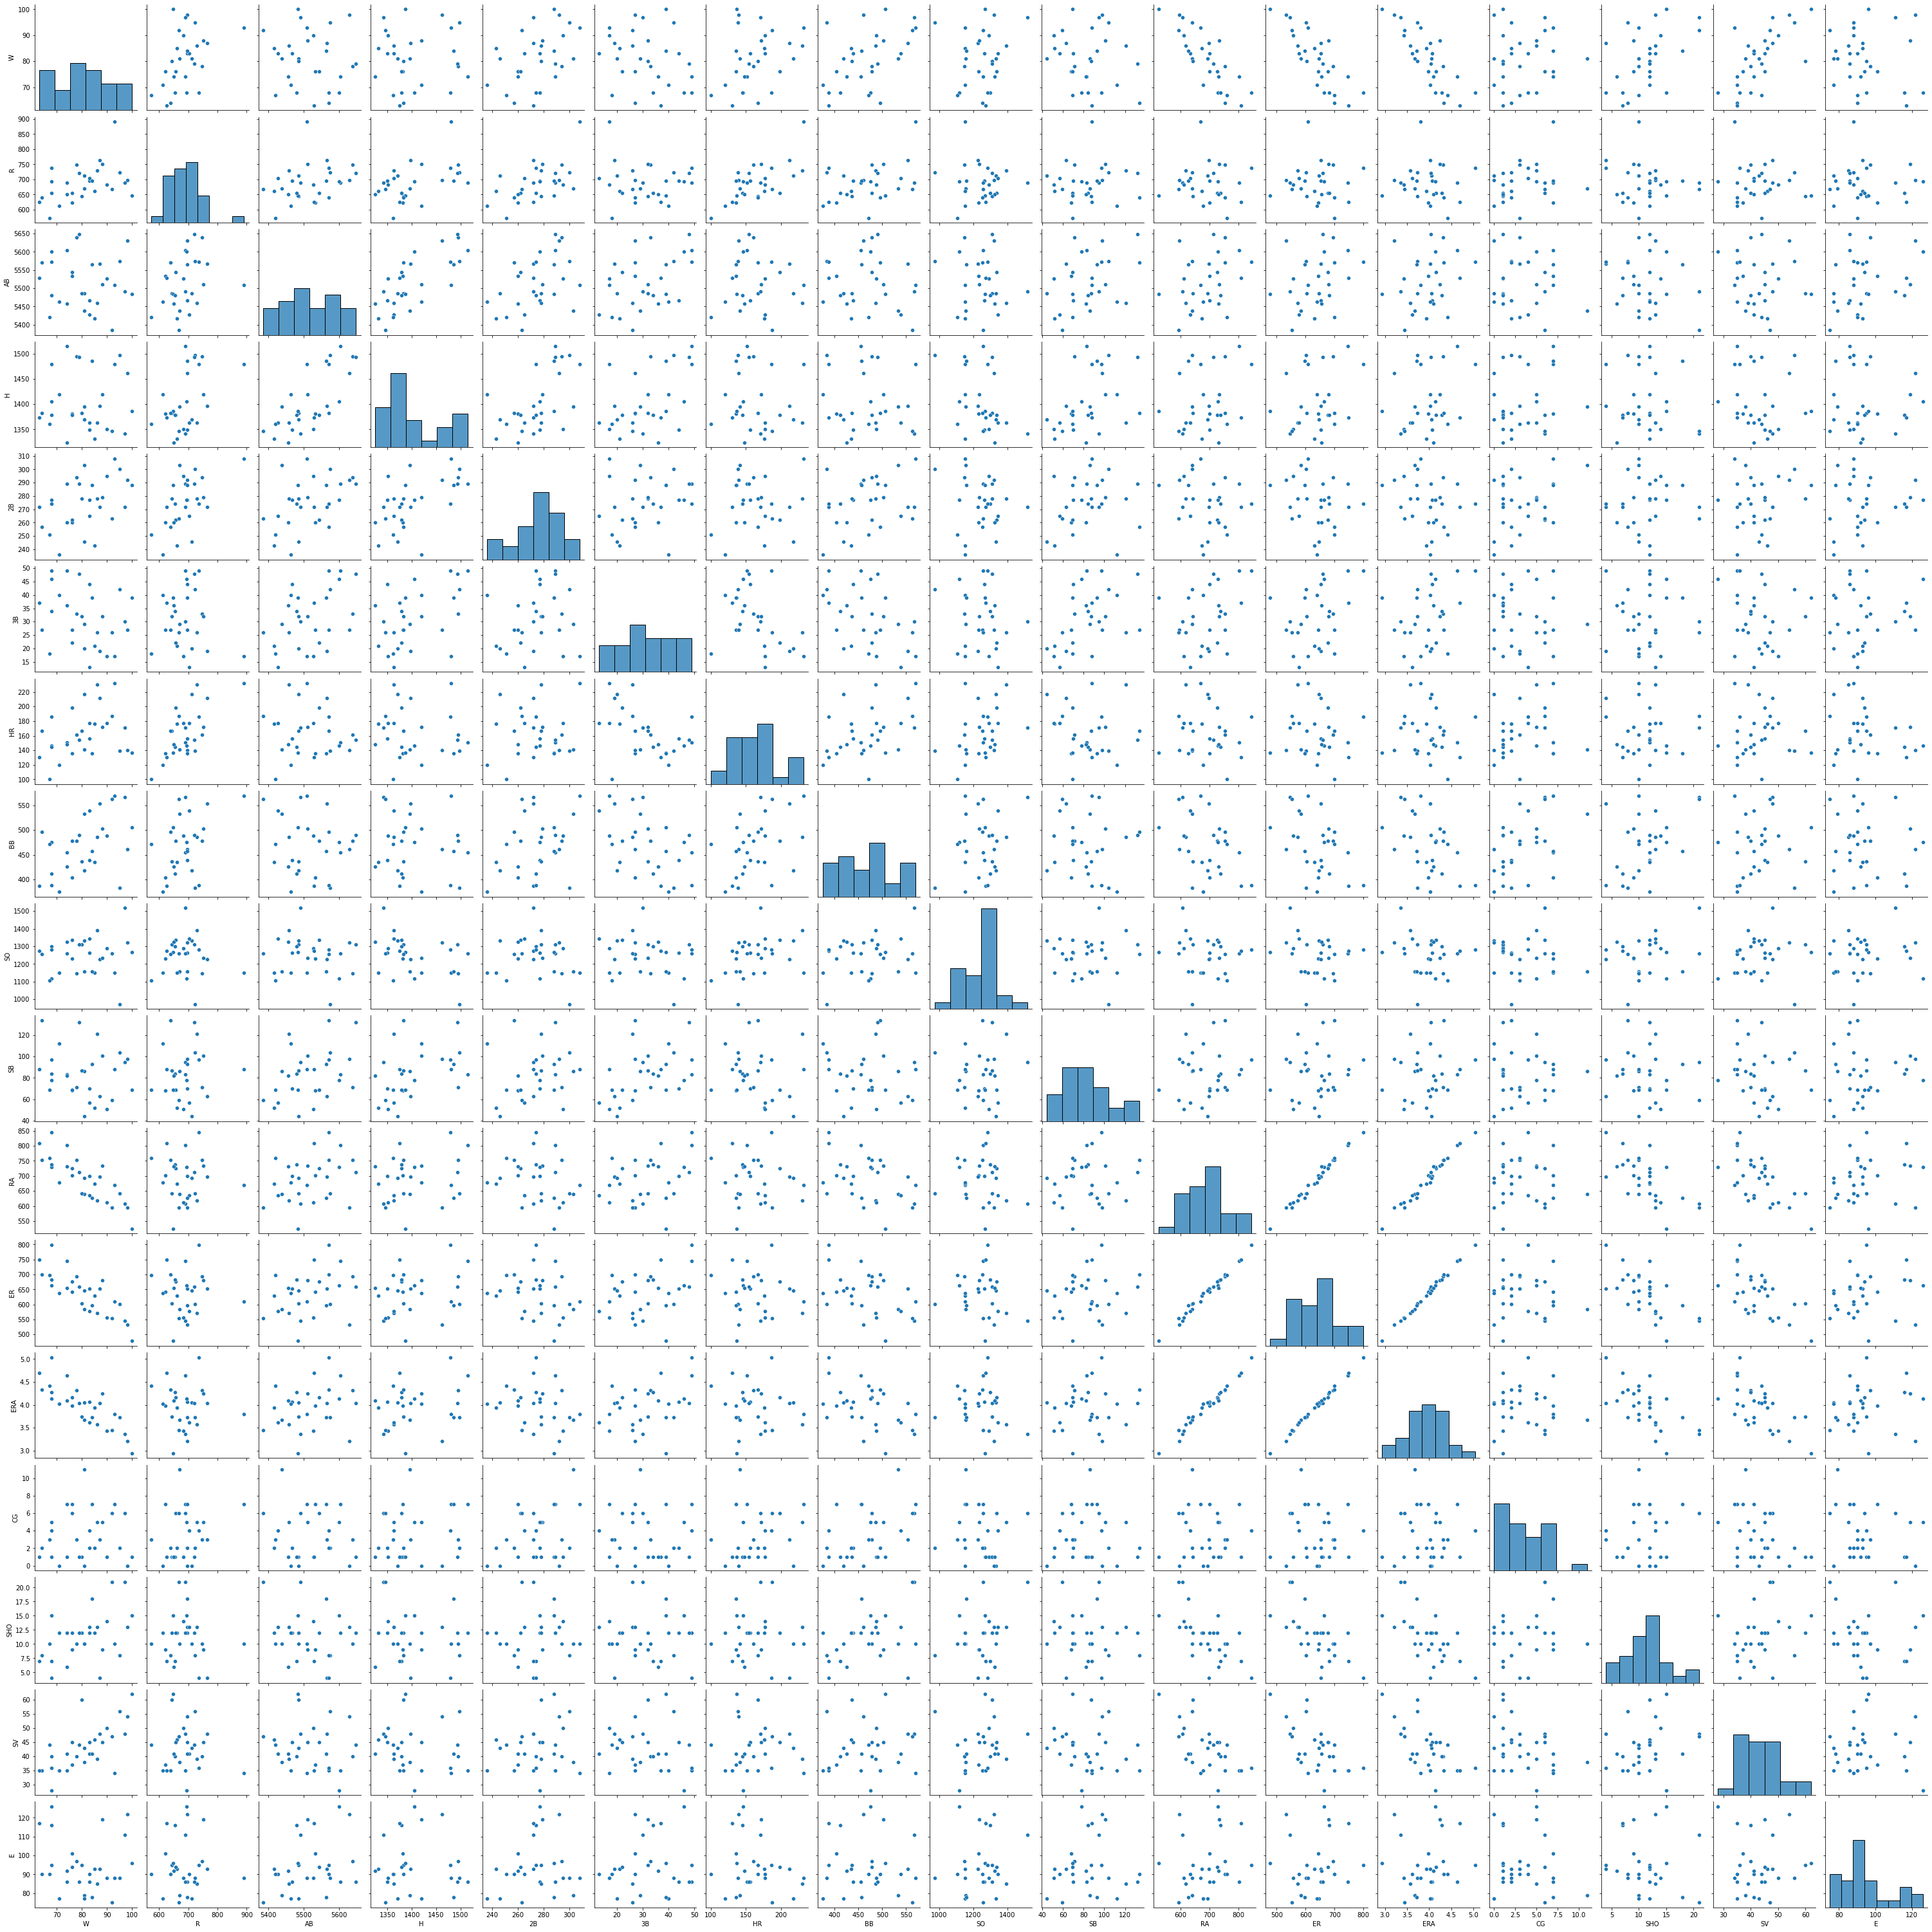

In [38]:
sns.pairplot(df)

FINDING BEST MODEL FOR DATASETS

In [39]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

imputer=imputer.fit(df)

df=imputer.transform(df)

df

array([[9.500e+01, 7.240e+02, 5.575e+03, 1.497e+03, 3.000e+02, 4.200e+01,
        1.390e+02, 3.830e+02, 9.730e+02, 1.040e+02, 6.410e+02, 6.010e+02,
        3.730e+00, 2.000e+00, 8.000e+00, 5.600e+01, 8.800e+01],
       [8.300e+01, 6.960e+02, 5.467e+03, 1.349e+03, 2.770e+02, 4.400e+01,
        1.560e+02, 4.390e+02, 1.264e+03, 7.000e+01, 7.000e+02, 6.530e+02,
        4.070e+00, 2.000e+00, 1.200e+01, 4.500e+01, 8.600e+01],
       [8.100e+01, 6.690e+02, 5.439e+03, 1.395e+03, 3.030e+02, 2.900e+01,
        1.410e+02, 5.330e+02, 1.157e+03, 8.600e+01, 6.400e+02, 5.840e+02,
        3.670e+00, 1.100e+01, 1.000e+01, 3.800e+01, 7.900e+01],
       [7.600e+01, 6.220e+02, 5.533e+03, 1.381e+03, 2.600e+02, 2.700e+01,
        1.360e+02, 4.040e+02, 1.231e+03, 6.800e+01, 7.010e+02, 6.430e+02,
        3.980e+00, 7.000e+00, 9.000e+00, 3.700e+01, 1.010e+02],
       [7.400e+01, 6.890e+02, 5.605e+03, 1.515e+03, 2.890e+02, 4.900e+01,
        1.510e+02, 4.550e+02, 1.259e+03, 8.300e+01, 8.030e+02, 7.460e+02,
    

In [40]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,95.0,724.0,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,601.0,3.73,2.0,8.0,56.0,88.0
1,83.0,696.0,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,653.0,4.07,2.0,12.0,45.0,86.0
2,81.0,669.0,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,584.0,3.67,11.0,10.0,38.0,79.0
3,76.0,622.0,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,643.0,3.98,7.0,9.0,37.0,101.0
4,74.0,689.0,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,746.0,4.64,7.0,12.0,35.0,86.0
5,93.0,891.0,5509.0,1480.0,308.0,17.0,232.0,570.0,1151.0,88.0,670.0,609.0,3.80,7.0,10.0,34.0,88.0
6,87.0,764.0,5567.0,1397.0,272.0,19.0,212.0,554.0,1227.0,63.0,698.0,652.0,4.03,3.0,4.0,48.0,93.0
7,81.0,713.0,5485.0,1370.0,246.0,20.0,217.0,418.0,1331.0,44.0,693.0,646.0,4.05,0.0,10.0,43.0,77.0
8,80.0,644.0,5485.0,1383.0,278.0,32.0,167.0,436.0,1310.0,87.0,642.0,604.0,3.74,1.0,12.0,60.0,95.0
9,78.0,748.0,5640.0,1495.0,294.0,33.0,161.0,478.0,1148.0,71.0,753.0,694.0,4.31,3.0,10.0,40.0,97.0


In [41]:
x=df.iloc[:,1:-1]

In [42]:
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,724.0,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,601.0,3.73,2.0,8.0,56.0
1,696.0,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,653.0,4.07,2.0,12.0,45.0
2,669.0,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,584.0,3.67,11.0,10.0,38.0
3,622.0,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,643.0,3.98,7.0,9.0,37.0
4,689.0,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,746.0,4.64,7.0,12.0,35.0


In [43]:
x.shape

(30, 15)

In [44]:
y=df.iloc[:,-1]

In [45]:
y.head()

0     88.0
1     86.0
2     79.0
3    101.0
4     86.0
Name: 16, dtype: float64

In [46]:
y.shape

(30,)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [48]:
x_train.shape

(24, 15)

In [49]:
x_test.shape

(6, 15)

In [50]:
y_train.shape

(24,)

In [51]:
y_test.shape

(6,)

In [52]:
lm=LinearRegression()

In [53]:
lm.fit(x_train,y_train)

LinearRegression()

In [54]:
lm.score(x_train,y_train)

0.7920203990990184

In [55]:
lm.coef_

array([ 4.28881903e-01, -8.43590302e-02, -1.13517298e-01,  7.17414127e-02,
       -1.58776816e+00, -6.53256934e-01, -2.06097542e-01,  8.04403548e-02,
        2.76358079e-01, -6.93365763e-02,  1.83999038e+00, -2.44596021e+02,
        2.05121201e+00,  1.14041700e+00,  7.25432404e-01])

In [56]:
pred=lm.predict(x_test)

In [57]:
print('predicted value and actual value is',pred,y_test)

predicted value and actual value is [ 56.67756504 112.50638501  69.83235675  89.80111037  96.97239905
  62.19923832] 15     96.0
5      88.0
22     77.0
26     78.0
18    116.0
14    126.0
Name: 16, dtype: float64


In [58]:
from sklearn.metrics import mean_absolute_error

In [61]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred))

Mean Absolute error: 27.604322703872015


In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

Root mean squared error: 33.59078470339915


In [ ]:
#conclusion - We have used LinearRegression in this dataset and achieve the accuracy score of the team.
#it is used for predicting the number of wings for the team of Baseball.